In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks H-Farm/merged_data_encoded_with_clustered_kmeans_district_final_withriver.csv')

In [ ]:
df.drop('Unnamed: 0', axis = 1, inplace = True)
df.drop('Unnamed: 0.1', axis = 1, inplace = True)
df
df

,rideable_type,Date time,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,Maximum Temperature,Minimum Temperature,Temperature,Wind Chill,Heat Index,Precipitation,Snow,Snow Depth,Wind Speed,Wind Direction,Wind Gust,Visibility,Cloud Cover,Relative Humidity,Conditions,Duration,closest distrect from start,closest distrect from end,Start district name,Start district latitude,Start district longitudine,End district name,End district latitude,End district longitudine,Start count,End count,closest distrect from start copy,closest distrect from end copy,hour,day,Duration_log,cluster_start,centroids,cluster_end
0,electric_bike,02/01/2021 00:00:00,2021-02-01 00:30:35,2021-02-01 01:27:41,11th & Kenyon St NW,31102.0,Georgia Ave & Piney Branch Rd NW,31414.0,38.929544,-77.027860,38.967577,-77.028057,member,-0.7,-0.7,-0.7,-6.9,NaN,0.0,0.00,4.02,25.3,21,NaN,6.5,100.0,90.20,Overcast,3426.0,5,18,Columbia Heights,38.928882,-77.029778,Petworth,38.942670,-77.025281,27945,16781,skirt2,outskirt,Night,Week_day,8.139149,6,0,2
1,classic_bike,02/01/2021 08:00:00,2021-02-01 08:54:39,2021-02-01 09:05:12,14th & Girard St NW,31123.0,14th St Heights / 14th & Crittenden St NW,31402.0,38.925284,-77.032375,38.947774,-77.032818,member,-1.6,-1.6,-1.6,-8.2,NaN,0.0,0.17,5.35,26.5,333,NaN,7.1,100.0,88.99,Snow,633.0,5,18,Columbia Heights,38.928882,-77.029778,Petworth,38.942670,-77.025281,27945,16781,skirt2,outskirt,Morning,Week_day,6.450470,6,0,6
2,classic_bike,02/01/2021 14:00:00,2021-02-01 14:53:52,2021-02-01 15:12:03,14th & Harvard St NW,31105.0,Georgia & New Hampshire Ave NW,31400.0,38.926800,-77.032200,38.936684,-77.024181,casual,0.0,0.0,0.0,-5.7,NaN,0.0,0.06,5.68,23.4,340,NaN,6.6,100.0,88.72,Snow,1091.0,5,18,Columbia Heights,38.928882,-77.029778,Petworth,38.942670,-77.025281,27945,16781,skirt2,outskirt,Afternoon,Week_day,6.994850,6,0,6
3,electric_bike,02/01/2021 15:00:00,2021-02-01 15:07:54,2021-02-01 15:12:46,14th & Irving St NW,31124.0,NaN,NaN,38.928717,-77.032217,38.940000,-77.020000,member,0.5,0.5,0.5,-4.9,NaN,0.0,0.06,5.74,22.6,339,40.7,4.1,99.3,87.82,Snow,292.0,5,18,Columbia Heights,38.928882,-77.029778,Petworth,38.942670,-77.025281,27945,16781,skirt2,outskirt,Afternoon,Week_day,5.676754,6,0,6
4,electric_bike,02/01/2021 15:00:00,2021-02-01 15:13:33,2021-02-01 15:21:13,Park Rd & Holmead Pl NW,31602.0,NaN,NaN,38.930746,-77.031286,38.950000,-77.020000,casual,0.5,0.5,0.5,-4.9,NaN,0.0,0.06,5.74,22.6,339,40.7,4.1,99.3,87.82,Snow,460.0,5,18,Columbia Heights,38.928882,-77.029778,Petworth,38.942670,-77.025281,27945,16781,skirt2,outskirt,Afternoon,Week_day,6.131226,6,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
453736,classic_bike,04/25/2021 15:00:00,2021-04-25 15:19:12,2021-04-25 16:06:25,Jefferson Dr & 14th St SW,31247.0,Mt Vernon Trail & S. Washington St.,31929.0,38.888553,-77.032427,38.793065,-77.049436,member,18.3,18.3,18.3,NaN,NaN,0.0,0.00,0.00,22.6,310,44.8,16.0,84.2,50.29,Overcast,2833.0,15,6,National Mall,38.887398,-77.036415,Congress Heights,38.842997,-76.995403,26742,9742,skirt2,outskirt,Afternoon,Week_end,7.949091,1,0,5
453737,classic_bike,04/26/2021 12:00:00,2021-04-26 12:17:46,2021-04-26 12:59:34,Jefferson Memorial,31249.0,Prince St & Union St,31041.0,38.879819,-77.037413,38.803124,-77.040363,casual,15.5,15.5,15.5,NaN,NaN,0.0,0.00,0.00,22.1,311,36.9,16.0,0.0,23.62,Clear,2508.0,15,6,National Mall,38.887398,-77.036415,Congress Heights,38.842997,-76.995403,26742,9742,skirt2,outskirt,Afternoon,Week_day,7.827241,1,0,5
453738,electric_bike,04/27/2021 11:00:00,2021-04-27 11:32:38,2021-04-27 11:57:15,Jefferson Memorial,31249.0,Prince St & Union St,31041.0,38.879786,-77.037337,38.803253,-77.040232,casual,19.0,19.0,19.0,NaN,NaN,0.0,0.00,0.00,10.8,170,NaN,16.0,79.3,50.09,Overcast,1477.0,15,6,National Mall,38.887398,-77.036415,C

In [ ]:
df.dropna(subset = ['end_lat', 'start_lat'], inplace = True)

In [ ]:
pip install haversine

In [ ]:
import haversine as hs

df.loc[:,'distance'] = df.apply(lambda row : hs.haversine((row['start_lat'],row['start_lng']),(row['end_lat'], row['end_lng'])) , axis = 1)
df


,rideable_type,Date time,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,Maximum Temperature,Minimum Temperature,Temperature,Wind Chill,Heat Index,Precipitation,Snow,Snow Depth,Wind Speed,Wind Direction,Wind Gust,Visibility,Cloud Cover,Relative Humidity,Conditions,Duration,closest distrect from start,closest distrect from end,Start district name,Start district latitude,Start district longitudine,End district name,End district latitude,End district longitudine,Start count,End count,closest distrect from start copy,closest distrect from end copy,hour,day,Duration_log,cluster_start,centroids,cluster_end,distance
0,electric_bike,02/01/2021 00:00:00,2021-02-01 00:30:35,2021-02-01 01:27:41,11th & Kenyon St NW,31102.0,Georgia Ave & Piney Branch Rd NW,31414.0,38.929544,-77.027860,38.967577,-77.028057,member,-0.7,-0.7,-0.7,-6.9,NaN,0.0,0.00,4.02,25.3,21,NaN,6.5,100.0,90.20,Overcast,3426.0,5,18,Columbia Heights,38.928882,-77.029778,Petworth,38.942670,-77.025281,27945,16781,skirt2,outskirt,Night,Week_day,8.139149,6,0,2,4.229135
1,classic_bike,02/01/2021 08:00:00,2021-02-01 08:54:39,2021-02-01 09:05:12,14th & Girard St NW,31123.0,14th St Heights / 14th & Crittenden St NW,31402.0,38.925284,-77.032375,38.947774,-77.032818,member,-1.6,-1.6,-1.6,-8.2,NaN,0.0,0.17,5.35,26.5,333,NaN,7.1,100.0,88.99,Snow,633.0,5,18,Columbia Heights,38.928882,-77.029778,Petworth,38.942670,-77.025281,27945,16781,skirt2,outskirt,Morning,Week_day,6.450470,6,0,6,2.501071
2,classic_bike,02/01/2021 14:00:00,2021-02-01 14:53:52,2021-02-01 15:12:03,14th & Harvard St NW,31105.0,Georgia & New Hampshire Ave NW,31400.0,38.926800,-77.032200,38.936684,-77.024181,casual,0.0,0.0,0.0,-5.7,NaN,0.0,0.06,5.68,23.4,340,NaN,6.6,100.0,88.72,Snow,1091.0,5,18,Columbia Heights,38.928882,-77.029778,Petworth,38.942670,-77.025281,27945,16781,skirt2,outskirt,Afternoon,Week_day,6.994850,6,0,6,1.299628
3,electric_bike,02/01/2021 15:00:00,2021-02-01 15:07:54,2021-02-01 15:12:46,14th & Irving St NW,31124.0,NaN,NaN,38.928717,-77.032217,38.940000,-77.020000,member,0.5,0.5,0.5,-4.9,NaN,0.0,0.06,5.74,22.6,339,40.7,4.1,99.3,87.82,Snow,292.0,5,18,Columbia Heights,38.928882,-77.029778,Petworth,38.942670,-77.025281,27945,16781,skirt2,outskirt,Afternoon,Week_day,5.676754,6,0,6,1.640299
4,electric_bike,02/01/2021 15:00:00,2021-02-01 15:13:33,2021-02-01 15:21:13,Park Rd & Holmead Pl NW,31602.0,NaN,NaN,38.930746,-77.031286,38.950000,-77.020000,casual,0.5,0.5,0.5,-4.9,NaN,0.0,0.06,5.74,22.6,339,40.7,4.1,99.3,87.82,Snow,460.0,5,18,Columbia Heights,38.928882,-77.029778,Petworth,38.942670,-77.025281,27945,16781,skirt2,outskirt,Afternoon,Week_day,6.131226,6,0,2,2.353002
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
453736,classic_bike,04/25/2021 15:00:00,2021-04-25 15:19:12,2021-04-25 16:06:25,Jefferson Dr & 14th St SW,31247.0,Mt Vernon Trail & S. Washington St.,31929.0,38.888553,-77.032427,38.793065,-77.049436,member,18.3,18.3,18.3,NaN,NaN,0.0,0.00,0.00,22.6,310,44.8,16.0,84.2,50.29,Overcast,2833.0,15,6,National Mall,38.887398,-77.036415,Congress Heights,38.842997,-76.995403,26742,9742,skirt2,outskirt,Afternoon,Week_end,7.949091,1,0,5,10.719479
453737,classic_bike,04/26/2021 12:00:00,2021-04-26 12:17:46,2021-04-26 12:59:34,Jefferson Memorial,31249.0,Prince St & Union St,31041.0,38.879819,-77.037413,38.803124,-77.040363,casual,15.5,15.5,15.5,NaN,NaN,0.0,0.00,0.00,22.1,311,36.9,16.0,0.0,23.62,Clear,2508.0,15,6,National Mall,38.887398,-77.036415,Congress Heights,38.842997,-76.995403,26742,9742,skirt2,outskirt,Afternoon,Week_day,7.827241,1,0,5,8.531933
453738,electric_bike,04/27/2021 11:00:00,2021-04-27 11:32:38,2021-04-27 11:57:15,Jefferson Memorial,31249.0,Prince St & Union St,31041.0,38.879786,-77.037337,38.803253,-77.040232,casual,19.0,19.0,19.0,NaN,NaN,0.0,0.00,0.00,10.8,170,

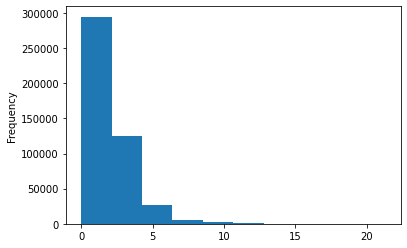

In [ ]:
df['distance'].plot(kind='hist')

In [ ]:
columns =['rideable_type', 'member_casual', 'distance', 'Precipitation', 'Temperature', 'Wind Speed', 'Conditions', 'Duration', 'Duration_log', 'closest distrect from start copy', 'closest distrect from end copy','cluster_start', 'cluster_end', 'hour', 'day']

In [ ]:
df1= df[columns]
df1

,rideable_type,member_casual,distance,Precipitation,Temperature,Wind Speed,Conditions,Duration,Duration_log,closest distrect from start copy,closest distrect from end copy,cluster_start,cluster_end,hour,day
0,electric_bike,member,4.229135,0.0,-0.7,25.3,Overcast,3426.0,8.139149,skirt2,outskirt,6,2,Night,Week_day
1,classic_bike,member,2.501071,0.0,-1.6,26.5,Snow,633.0,6.450470,skirt2,outskirt,6,6,Morning,Week_day
2,classic_bike,casual,1.299628,0.0,0.0,23.4,Snow,1091.0,6.994850,skirt2,outskirt,6,6,Afternoon,Week_day
3,electric_bike,member,1.640299,0.0,0.5,22.6,Snow,292.0,5.676754,skirt2,outskirt,6,6,Afternoon,Week_day
4,electric_bike,casual,2.353002,0.0,0.5,22.6,Snow,460.0,6.131226,skirt2,outskirt,6,2,Afternoon,Week_day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
453736,classic_bike,member,10.719479,0.0,18.3,22.6,Overcast,2833.0,7.949091,skirt2,outskirt,1,5,Afternoon,Week_end
453737,classic_bike,casual,8.531933,0.0,15.5,22.1,Clear,2508.0,7.827241,skirt2,outskirt,1,5,Afternoon,Week_day
453738,electric_bike,casual,8.513730,0.0,19.0,10.8,Overcast,1477.0,7.297768,skirt2,outskirt,1,5,Morning,Week_day
453739,classic_bike,casual,8.531933,0.0,18.8,33.8,Partially cloudy,2227.0,7.708411,skirt2,outskirt,1,5,Morning,Week_day


In [ ]:
df1.loc[:,"trip_skirt_dist"] = df1.loc[:,"closest distrect from start copy"] + '-' + df1.loc[:,"closest distrect from end copy"]
df1.loc[:,"trip"] = df1.cluster_start.astype(str) + '-'+ df1.cluster_end.astype(str)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


In [ ]:
df1

,rideable_type,member_casual,distance,Precipitation,Temperature,Wind Speed,Conditions,Duration,Duration_log,closest distrect from start copy,closest distrect from end copy,cluster_start,cluster_end,hour,day,trip_skirt_dist,trip
0,electric_bike,member,4.229135,0.0,-0.7,25.3,Overcast,3426.0,8.139149,skirt2,outskirt,6,2,Night,Week_day,skirt2-outskirt,6-2
1,classic_bike,member,2.501071,0.0,-1.6,26.5,Snow,633.0,6.450470,skirt2,outskirt,6,6,Morning,Week_day,skirt2-outskirt,6-6
2,classic_bike,casual,1.299628,0.0,0.0,23.4,Snow,1091.0,6.994850,skirt2,outskirt,6,6,Afternoon,Week_day,skirt2-outskirt,6-6
3,electric_bike,member,1.640299,0.0,0.5,22.6,Snow,292.0,5.676754,skirt2,outskirt,6,6,Afternoon,Week_day,skirt2-outskirt,6-6
4,electric_bike,casual,2.353002,0.0,0.5,22.6,Snow,460.0,6.131226,skirt2,outskirt,6,2,Afternoon,Week_day,skirt2-outskirt,6-2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
453736,classic_bike,member,10.719479,0.0,18.3,22.6,Overcast,2833.0,7.949091,skirt2,outskirt,1,5,Afternoon,Week_end,skirt2-outskirt,1-5
453737,classic_bike,casual,8.531933,0.0,15.5,22.1,Clear,2508.0,7.827241,skirt2,outskirt,1,5,Afternoon,Week_day,skirt2-outskirt,1-5
453738,electric_bike,casual,8.513730,0.0,19.0,10.8,Overcast,1477.0,7.297768,skirt2,outskirt,1,5,Morning,Week_day,skirt2-outskirt,1-5
453739,classic_bike,casual,8.531933,0.0,18.8,33.8,Partially cloudy,2227.0,7.708411,skirt2,outskirt,1,5,Morning,Week_day,skirt2-outskirt,1-5


In [ ]:
df1.trip.value_counts()

6-6     69756
0-0     54695
1-1     43331
9-9     38619
6-9     23706
        ...  
8-10       11
10-7        7
7-2         6
5-2         3
10-8        2
Name: trip, Length: 81, dtype: int64

In [ ]:
d = {}
for i in range(0,11):
  for j in range(0,11):
    if i == j:
      continue
    if str(i) + '-' + str(j) not in d.values():
      if i<j:
        d[str(i) + '-' + str(j)] = str(i) + '-' + str(j)
      else:
         d[str(j) + '-' + str(i)] = str(i) + '-' + str(j)
d

{'0-1': '1-0',
 '0-10': '10-0',
 '0-2': '2-0',
 '0-3': '3-0',
 '0-4': '4-0',
 '0-5': '5-0',
 '0-6': '6-0',
 '0-7': '7-0',
 '0-8': '8-0',
 '0-9': '9-0',
 '1-10': '10-1',
 '1-2': '2-1',
 '1-3': '3-1',
 '1-4': '4-1',
 '1-5': '5-1',
 '1-6': '6-1',
 '1-7': '7-1',
 '1-8': '8-1',
 '1-9': '9-1',
 '2-10': '10-2',
 '2-3': '3-2',
 '2-4': '4-2',
 '2-5': '5-2',
 '2-6': '6-2',
 '2-7': '7-2',
 '2-8': '8-2',
 '2-9': '9-2',
 '3-10': '10-3',
 '3-4': '4-3',
 '3-5': '5-3',
 '3-6': '6-3',
 '3-7': '7-3',
 '3-8': '8-3',
 '3-9': '9-3',
 '4-10': '10-4',
 '4-5': '5-4',
 '4-6': '6-4',
 '4-7': '7-4',
 '4-8': '8-4',
 '4-9': '9-4',
 '5-10': '10-5',
 '5-6': '6-5',
 '5-7': '7-5',
 '5-8': '8-5',
 '5-9': '9-5',
 '6-10': '10-6',
 '6-7': '7-6',
 '6-8': '8-6',
 '6-9': '9-6',
 '7-10': '10-7',
 '7-8': '8-7',
 '7-9': '9-7',
 '8-10': '10-8',
 '8-9': '9-8',
 '9-10': '10-9'}

In [ ]:
new_trip = {'trip': {'0-1': '1-0',
 '0-10': '10-0',
 '0-2': '2-0',
 '0-3': '3-0',
 '0-4': '4-0',
 '0-5': '5-0',
 '0-6': '6-0',
 '0-7': '7-0',
 '0-8': '8-0',
 '0-9': '9-0',
 '1-10': '10-1',
 '1-2': '2-1',
 '1-3': '3-1',
 '1-4': '4-1',
 '1-5': '5-1',
 '1-6': '6-1',
 '1-7': '7-1',
 '1-8': '8-1',
 '1-9': '9-1',
 '2-10': '10-2',
 '2-3': '3-2',
 '2-4': '4-2',
 '2-5': '5-2',
 '2-6': '6-2',
 '2-7': '7-2',
 '2-8': '8-2',
 '2-9': '9-2',
 '3-10': '10-3',
 '3-4': '4-3',
 '3-5': '5-3',
 '3-6': '6-3',
 '3-7': '7-3',
 '3-8': '8-3',
 '3-9': '9-3',
 '4-10': '10-4',
 '4-5': '5-4',
 '4-6': '6-4',
 '4-7': '7-4',
 '4-8': '8-4',
 '4-9': '9-4',
 '5-10': '10-5',
 '5-6': '6-5',
 '5-7': '7-5',
 '5-8': '8-5',
 '5-9': '9-5',
 '6-10': '10-6',
 '6-7': '7-6',
 '6-8': '8-6',
 '6-9': '9-6',
 '7-10': '10-7',
 '7-8': '8-7',
 '7-9': '9-7',
 '8-10': '10-8',
 '8-9': '9-8',
 '9-10': '10-9'}}
df1.replace(new_trip, inplace = True)
df1

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


,rideable_type,member_casual,distance,Precipitation,Temperature,Wind Speed,Conditions,Duration,Duration_log,closest distrect from start copy,closest distrect from end copy,cluster_start,cluster_end,hour,day,trip_skirt_dist,trip
0,electric_bike,member,4.229135,0.0,-0.7,25.3,Overcast,3426.0,8.139149,skirt2,outskirt,6,2,Night,Week_day,skirt2-outskirt,6-2
1,classic_bike,member,2.501071,0.0,-1.6,26.5,Snow,633.0,6.450470,skirt2,outskirt,6,6,Morning,Week_day,skirt2-outskirt,6-6
2,classic_bike,casual,1.299628,0.0,0.0,23.4,Snow,1091.0,6.994850,skirt2,outskirt,6,6,Afternoon,Week_day,skirt2-outskirt,6-6
3,electric_bike,member,1.640299,0.0,0.5,22.6,Snow,292.0,5.676754,skirt2,outskirt,6,6,Afternoon,Week_day,skirt2-outskirt,6-6
4,electric_bike,casual,2.353002,0.0,0.5,22.6,Snow,460.0,6.131226,skirt2,outskirt,6,2,Afternoon,Week_day,skirt2-outskirt,6-2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
453736,classic_bike,member,10.719479,0.0,18.3,22.6,Overcast,2833.0,7.949091,skirt2,outskirt,1,5,Afternoon,Week_end,skirt2-outskirt,5-1
453737,classic_bike,casual,8.531933,0.0,15.5,22.1,Clear,2508.0,7.827241,skirt2,outskirt,1,5,Afternoon,Week_day,skirt2-outskirt,5-1
453738,electric_bike,casual,8.513730,0.0,19.0,10.8,Overcast,1477.0,7.297768,skirt2,outskirt,1,5,Morning,Week_day,skirt2-outskirt,5-1
453739,classic_bike,casual,8.531933,0.0,18.8,33.8,Partially cloudy,2227.0,7.708411,skirt2,outskirt,1,5,Morning,Week_day,skirt2-outskirt,5-1


In [ ]:
len(df1.trip.value_counts())

45

In [ ]:
new_conditions = {'Conditions': {'Rain':'Bad_weather', 'Snow':'Bad_weather', 'Clear' : 'Good_weather', 'Overcast':'Good_weather', 'Partially cloudy':'Good_weather'}}

df1.replace(new_conditions, inplace = True)
df1

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


,rideable_type,member_casual,distance,Precipitation,Temperature,Wind Speed,Conditions,Duration,Duration_log,closest distrect from start copy,closest distrect from end copy,cluster_start,cluster_end,hour,day,trip_skirt_dist,trip
0,electric_bike,member,4.229135,0.0,-0.7,25.3,Good_weather,3426.0,8.139149,skirt2,outskirt,6,2,Night,Week_day,skirt2-outskirt,6-2
1,classic_bike,member,2.501071,0.0,-1.6,26.5,Bad_weather,633.0,6.450470,skirt2,outskirt,6,6,Morning,Week_day,skirt2-outskirt,6-6
2,classic_bike,casual,1.299628,0.0,0.0,23.4,Bad_weather,1091.0,6.994850,skirt2,outskirt,6,6,Afternoon,Week_day,skirt2-outskirt,6-6
3,electric_bike,member,1.640299,0.0,0.5,22.6,Bad_weather,292.0,5.676754,skirt2,outskirt,6,6,Afternoon,Week_day,skirt2-outskirt,6-6
4,electric_bike,casual,2.353002,0.0,0.5,22.6,Bad_weather,460.0,6.131226,skirt2,outskirt,6,2,Afternoon,Week_day,skirt2-outskirt,6-2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
453736,classic_bike,member,10.719479,0.0,18.3,22.6,Good_weather,2833.0,7.949091,skirt2,outskirt,1,5,Afternoon,Week_end,skirt2-outskirt,5-1
453737,classic_bike,casual,8.531933,0.0,15.5,22.1,Good_weather,2508.0,7.827241,skirt2,outskirt,1,5,Afternoon,Week_day,skirt2-outskirt,5-1
453738,electric_bike,casual,8.513730,0.0,19.0,10.8,Good_weather,1477.0,7.297768,skirt2,outskirt,1,5,Morning,Week_day,skirt2-outskirt,5-1
453739,classic_bike,casual,8.531933,0.0,18.8,33.8,Good_weather,2227.0,7.708411,skirt2,outskirt,1,5,Morning,Week_day,skirt2-outskirt,5-1


In [ ]:
df1['Direction'] = df1['trip_skirt_dist']
new_trip = {'Direction': {'skirt2-outskirt':'Outwards', 'skirt1-skirt2':'Outwards', 'skirt1-outskirt':'Outwards', 'downtown-skirt1' : 'Outwards', 'downtown-skirt2' : 'Outwards', 'downtown-outskirt' : 'Outwards', 'outskirt-outskirt':'same_skirt', 'skirt2-skirt2':'same_skirt', 'skirt1-skirt1':'same_skirt', 'downtown-downtown':'same_skirt','outskirt-skirt2':'Inwards','outskirt-skirt1':'Inwards','outskirt-downtown':'Inwards', 'skirt2-skirt1':'Inwards', 'skirt2-downtown':'Inwards', 'skirt1-downtown' : 'Inwards' }}

df1.replace(new_trip, inplace = True)
df1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


,rideable_type,member_casual,distance,Precipitation,Temperature,Wind Speed,Conditions,Duration,Duration_log,closest distrect from start copy,closest distrect from end copy,cluster_start,cluster_end,hour,day,trip_skirt_dist,trip,Direction
0,electric_bike,member,4.229135,0.0,-0.7,25.3,Good_weather,3426.0,8.139149,skirt2,outskirt,6,2,Night,Week_day,skirt2-outskirt,6-2,Outwards
1,classic_bike,member,2.501071,0.0,-1.6,26.5,Bad_weather,633.0,6.450470,skirt2,outskirt,6,6,Morning,Week_day,skirt2-outskirt,6-6,Outwards
2,classic_bike,casual,1.299628,0.0,0.0,23.4,Bad_weather,1091.0,6.994850,skirt2,outskirt,6,6,Afternoon,Week_day,skirt2-outskirt,6-6,Outwards
3,electric_bike,member,1.640299,0.0,0.5,22.6,Bad_weather,292.0,5.676754,skirt2,outskirt,6,6,Afternoon,Week_day,skirt2-outskirt,6-6,Outwards
4,electric_bike,casual,2.353002,0.0,0.5,22.6,Bad_weather,460.0,6.131226,skirt2,outskirt,6,2,Afternoon,Week_day,skirt2-outskirt,6-2,Outwards
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
453736,classic_bike,member,10.719479,0.0,18.3,22.6,Good_weather,2833.0,7.949091,skirt2,outskirt,1,5,Afternoon,Week_end,skirt2-outskirt,5-1,Outwards
453737,classic_bike,casual,8.531933,0.0,15.5,22.1,Good_weather,2508.0,7.827241,skirt2,outskirt,1,5,Afternoon,Week_day,skirt2-outskirt,5-1,Outwards
453738,electric_bike,casual,8.513730,0.0,19.0,10.8,Good_weather,1477.0,7.297768,skirt2,outskirt,1,5,Morning,Week_day,skirt2-outskirt,5-1,Outwards
453739,classic_bike,casual,8.531933,0.0,18.8,33.8,Good_weather,2227.0,7.708411,skirt2,outskirt,1,5,Morning,Week_day,skirt2-outskirt,5-1,Outwards


In [ ]:
df1['trip_skirt_dist'].value_counts()

outskirt-outskirt    78140
skirt1-skirt1        53070
skirt2-skirt2        45224
outskirt-skirt2      30089
skirt1-downtown      29815
skirt2-outskirt      28315
downtown-skirt1      27686
skirt2-skirt1        27472
skirt1-skirt2        24850
downtown-downtown    22084
skirt2-downtown      18153
downtown-skirt2      17593
outskirt-skirt1      16151
skirt1-outskirt      14769
outskirt-downtown    10718
downtown-outskirt     9612
Name: trip_skirt_dist, dtype: int64

In [ ]:
df1['Direction'].value_counts()

same_skirt    198518
Inwards       132398
Outwards      122825
Name: Direction, dtype: int64

In [ ]:
#df1['prec_wind'] = 0.95 * df1['Precipitation'] + 0.05 * df1['Wind Speed'] CAMBIATO
df1['prec_wind'] = 0.90 * df1['Precipitation'] + 0.1 * df1['Wind Speed']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df_members = df1.loc[df1['member_casual']=='member',:]
df_casuals = df1.loc[df1['member_casual']=='casual',:]
df_members.shape, df_casuals.shape

((263146, 19), (190595, 19))

In [ ]:
df_members_backup = df_members.copy()
df_casuals_backup = df_casuals.copy()

In [ ]:
df_members = pd.get_dummies(df_members, columns=['rideable_type', 'member_casual', 'Conditions', 'hour', 'day', 'Direction', 'trip'])
df_casuals = pd.get_dummies(df_casuals, columns=['rideable_type', 'member_casual', 'Conditions', 'hour', 'day', 'Direction', 'trip'])

df_casuals

,distance,Precipitation,Temperature,Wind Speed,Duration,Duration_log,closest distrect from start copy,closest distrect from end copy,cluster_start,cluster_end,trip_skirt_dist,prec_wind,rideable_type_classic_bike,rideable_type_electric_bike,member_casual_casual,Conditions_Bad_weather,Conditions_Good_weather,hour_Afternoon,hour_Evening,hour_Morning,hour_Night,day_Week_day,day_Week_end,Direction_Inwards,Direction_Outwards,Direction_same_skirt,trip_0-0,trip_1-0,trip_1-1,trip_10-0,trip_10-1,trip_10-10,trip_10-2,trip_10-5,trip_10-6,trip_10-7,trip_10-8,trip_10-9,trip_2-0,trip_2-1,trip_2-2,trip_5-0,trip_5-1,trip_5-2,trip_5-5,trip_6-0,trip_6-1,trip_6-2,trip_6-5,trip_6-6,trip_7-0,trip_7-1,trip_7-2,trip_7-5,trip_7-6,trip_7-7,trip_8-0,trip_8-1,trip_8-2,trip_8-5,trip_8-6,trip_8-7,trip_8-8,trip_9-0,trip_9-1,trip_9-2,trip_9-5,trip_9-6,trip_9-7,trip_9-8,trip_9-9
2,1.299628,0.00,0.0,23.4,1091.0,6.994850,skirt2,outskirt,6,6,skirt2-outskirt,1.1700,1,0,1,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2.353002,0.00,0.5,22.6,460.0,6.131226,skirt2,outskirt,6,2,skirt2-outskirt,1.1300,0,1,1,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,1.620970,0.43,0.5,25.6,547.0,6.304449,skirt2,outskirt,6,6,skirt2-outskirt,1.6885,0,1,1,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
12,4.553349,0.37,1.0,24.7,1575.0,7.362011,skirt2,outskirt,6,2,skirt2-outskirt,1.5865,1,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
14,1.408743,0.02,1.6,28.1,735.0,6.599870,skirt2,outskirt,6,6,skirt2-outskirt,1.4240,0,1,1,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
453731,7.507479,0.00,18.3,9.8,2779.0,7.929846,skirt2,outskirt,1,5,skirt2-outskirt,0.4900,1,0,1,0,1,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
453732,9.531980,0.00,12.8,23.6,3130.0,8.048788,skirt2,outskirt,1,5,skirt2-outskirt,1.1800,0,1,1,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
453737,8.531933,0.00,15.5,22.1,2508.0,7.827241,skirt2,outskirt,1,5,skirt2-outskirt,1.1050,1,0,1,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
453738,8.513730,0.00,19.0,10.8,1477.0,7.297768,skirt2,outskirt,1,5,skirt2-outskirt,0.5400,0,1,1,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
df_members.drop(['trip_skirt_dist','closest distrect from start copy','closest distrect from end copy', 'cluster_start', "cluster_end", 'Duration'], axis = 1, inplace = True)
df_casuals.drop(['trip_skirt_dist','closest distrect from start copy','closest distrect from end copy', 'cluster_start', "cluster_end", 'Duration'], axis = 1, inplace = True)

In [ ]:
from sklearn.preprocessing import StandardScaler
# define standard scaler
scaler = StandardScaler()
# transform data for members
scaled = scaler.fit_transform(df_members[['Temperature','Duration_log', 'distance', 'prec_wind']])
df_members[['Temperature','Duration_log', 'distance', 'prec_wind']] = scaled

scaler = StandardScaler()
# transform data for casuals
scaled = scaler.fit_transform(df_casuals[['Temperature','Duration_log', 'distance', 'prec_wind']])
df_casuals[['Temperature','Duration_log', 'distance', 'prec_wind']] = scaled


In [ ]:
df_members.drop(['Wind Speed', 'Precipitation'], axis= 1, inplace= True)
df_casuals.drop(['Wind Speed', 'Precipitation'], axis= 1, inplace= True)

#Kmeans with total PCA

In [ ]:
df4_total = df_total_backup['trip']
df4_total = pd.get_dummies(df4_total, 'trip')

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.decomposition import PCA
import scipy.cluster.hierarchy as hc
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering

#
# Reduce the dimensionality of data to 3 features
#
pca = PCA(n_components=5)
df_pca = pca.fit_transform(df4_total)
df_pca = pd.DataFrame(df_pca)
df_pca.columns = ['P1', 'P2', 'P3', 'P4', 'P5']

In [ ]:
df_pca

,P1,P2,P3,P4,P5
0,-0.067243,-0.060577,-0.012375,0.032143,-0.052259
1,0.864732,0.147712,0.016478,-0.036287,0.044975
2,0.864732,0.147712,0.016478,-0.036287,0.044975
3,0.864732,0.147712,0.016478,-0.036287,0.044975
4,-0.067243,-0.060577,-0.012375,0.032143,-0.052259
...,...,...,...,...,...
453736,-0.063329,-0.056005,-0.011132,0.029116,-0.046361
453737,-0.063329,-0.056005,-0.011132,0.029116,-0.046361
453738,-0.063329,-0.056005,-0.011132,0.029116,-0.046361
453739,-0.063329,-0.056005,-0.011132,0.029116,-0.046361


In [ ]:
df_total = pd.concat((df_total, df_pca), axis = 1 )

In [ ]:
df_total

,distance,Temperature,Duration_log,prec_wind,rideable_type_classic_bike,rideable_type_electric_bike,member_casual_casual,member_casual_member,Conditions_Bad_weather,Conditions_Good_weather,hour_Afternoon,hour_Evening,hour_Morning,hour_Night,day_Week_day,day_Week_end,Direction_Inwards,Direction_Outwards,Direction_same_skirt,P1,P2,P3,P4,P5
0,1.466438,-2.100245,1.593466,0.815014,0,1,0,1,0,1,0,0,0,1,1,0,0,1,0,-0.067243,-0.060577,-0.012375,0.032143,-0.052259
1,0.362259,-2.229315,-0.284358,0.929682,1,0,0,1,1,0,0,0,1,0,1,0,0,1,0,0.864732,0.147712,0.016478,-0.036287,0.044975
2,-0.405425,-1.999858,0.320996,0.633455,1,0,1,0,1,0,1,0,0,0,1,0,0,1,0,0.864732,0.147712,0.016478,-0.036287,0.044975
3,-0.187747,-1.928153,-1.144737,0.557009,0,1,0,1,1,0,1,0,0,0,1,0,0,1,0,0.864732,0.147712,0.016478,-0.036287,0.044975
4,0.267648,-1.928153,-0.639360,0.557009,0,1,1,0,1,0,1,0,0,0,1,0,0,1,0,-0.067243,-0.060577,-0.012375,0.032143,-0.052259
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
453736,5.613563,0.624550,1.382121,0.557009,1,0,0,1,0,1,1,0,0,0,0,1,0,1,0,-0.063329,-0.056005,-0.011132,0.029116,-0.046361
453737,4.215790,0.223001,1.246622,0.509230,1,0,1,0,0,1,1,0,0,0,1,0,0,1,0,-0.063329,-0.056005,-0.011132,0.029116,-0.046361
453738,4.204159,0.724937,0.657844,-0.570567,0,1,1,0,0,1,0,0,1,0,1,0,0,1,0,-0.063329,-0.056005,-0.011132,0.029116,-0.046361
453739,4.215790,0.696255,1.114482,1.627250,1,0,1,0,0,1,0,0,1,0,1,0,0,1,0,-0.063329,-0.056005,-0.011132,0.029116,-0.046361


In [ ]:
from sklearn.cluster import KMeans
# objective function is nothing but argmin of c (sum of (|x-c|)^2 )  c: centroid ,x=point in data set
objective_function=[] 
for i in range(1,20):
    clustering=KMeans(n_clusters=i, init='k-means++')
    clustering.fit(df_total)
    objective_function.append(clustering.inertia_)
#inertia is calculaing min intra cluster distance
# objective function contains min intra cluster distances 
objective_function

[3259307.306098046,
 2824841.222100585,
 2587669.6308768513,
 2401435.2972622276,
 2267546.6985945306,
 2181049.3352268594,
 2106812.104234556,
 2048474.4107705147,
 1998350.7724756761,
 1951836.139784914,
 1913634.4722091248,
 1871300.5546623394,
 1841296.0232428727,
 1807960.745348299,
 1783436.0526281865,
 1767038.3122529432,
 1735020.7816076917,
 1714732.84816234,
 1692279.0895926268]

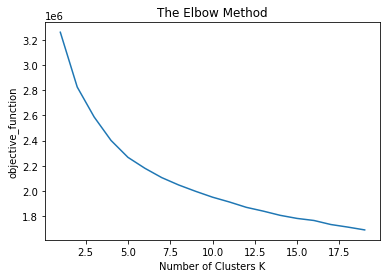

In [ ]:
import matplotlib.pyplot as plt 

plt.plot(range(1,20),objective_function)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters K')
plt.ylabel('objective_function')
plt.show()

In [ ]:
# Training the model with optimal no of clusters
tuned_clustering=KMeans(n_clusters=7,init='k-means++',random_state=0)
labels=tuned_clustering.fit_predict(df_total)
# x and y  coordinates of all clusters
# Centroids of clusters
tuned_clustering.cluster_centers_[:]

array([[-0.84805233,  0.36015332,  1.61512208, -0.09311809,  0.86758627,
         0.13241373,  0.89295505,  0.10704495,  0.01503416,  0.98496584,
         0.63565554,  0.20451677,  0.14690396,  0.01292372,  0.54310082,
         0.45689918,  0.11724903,  0.10674035,  0.77601062, -0.09372715,
        -0.07475077,  0.19701198,  0.04233546,  0.11797755],
       [-0.13246594, -1.1711594 , -0.36147497, -0.42815402,  0.72199583,
         0.27800417,  0.25232981,  0.74767019,  0.05802406,  0.94197594,
         0.25641586,  0.24801433,  0.4534857 ,  0.0420841 ,  0.78068632,
         0.21931368,  0.33568955,  0.27578635,  0.38852411,  0.04506374,
         0.03492213, -0.0524137 , -0.03205254, -0.00436391],
       [ 0.12863938,  0.92461942,  0.0670163 ,  0.09025116,  0.775817  ,
         0.224183  ,  0.40392932,  0.59607068,  0.01459942,  0.98540058,
         0.56966645,  0.32221111,  0.10022044,  0.007902  ,  0.99021887,
         0.00978113,  0.35698712,  0.35756532,  0.28544756, -0.03666876,
  

In [ ]:
df2_total = pd.concat((pd.DataFrame(labels), df_total_backup.reset_index()), axis = 1)
df2_total.rename({0:'Cluster'}, axis = 1, inplace= True)

df2_total

,Cluster,index,rideable_type,member_casual,distance,Precipitation,Temperature,Wind Speed,Conditions,Duration,Duration_log,closest distrect from start copy,closest distrect from end copy,cluster_start,cluster_end,hour,day,trip_skirt_dist,trip,Direction,prec_wind
0,4,0,electric_bike,member,4.229135,0.0,-0.7,25.3,Good_weather,3426.0,8.139149,skirt2,outskirt,6,2,Night,Week_day,skirt2-outskirt,6-2,Outwards,1.265
1,1,1,classic_bike,member,2.501071,0.0,-1.6,26.5,Bad_weather,633.0,6.450470,skirt2,outskirt,6,6,Morning,Week_day,skirt2-outskirt,6-6,Outwards,1.325
2,1,2,classic_bike,casual,1.299628,0.0,0.0,23.4,Bad_weather,1091.0,6.994850,skirt2,outskirt,6,6,Afternoon,Week_day,skirt2-outskirt,6-6,Outwards,1.170
3,1,3,electric_bike,member,1.640299,0.0,0.5,22.6,Bad_weather,292.0,5.676754,skirt2,outskirt,6,6,Afternoon,Week_day,skirt2-outskirt,6-6,Outwards,1.130
4,1,4,electric_bike,casual,2.353002,0.0,0.5,22.6,Bad_weather,460.0,6.131226,skirt2,outskirt,6,2,Afternoon,Week_day,skirt2-outskirt,6-2,Outwards,1.130
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
453736,4,453736,classic_bike,member,10.719479,0.0,18.3,22.6,Good_weather,2833.0,7.949091,skirt2,outskirt,1,5,Afternoon,Week_end,skirt2-outskirt,5-1,Outwards,1.130
453737,4,453737,classic_bike,casual,8.531933,0.0,15.5,22.1,Good_weather,2508.0,7.827241,skirt2,outskirt,1,5,Afternoon,Week_day,skirt2-outskirt,5-1,Outwards,1.105
453738,4,453738,electric_bike,casual,8.513730,0.0,19.0,10.8,Good_weather,1477.0,7.297768,skirt2,outskirt,1,5,Morning,Week_day,skirt2-outskirt,5-1,Outwards,0.540
453739,4,453739,classic_bike,casual,8.531933,0.0,18.8,33.8,Good_weather,2227.0,7.708411,skirt2,outskirt,1,5,Morning,Week_day,skirt2-outskirt,5-1,Outwards,1.690


In [ ]:
import matplotlib.pyplot as plt
x = df2_total.groupby(['Cluster','Conditions'])[ 'member_casual'].value_counts(normalize=True)
x

Cluster  Conditions    member_casual
0        Bad_weather   casual           0.799133
                       member           0.200867
         Good_weather  casual           0.894476
                       member           0.105524
1        Bad_weather   member           0.777820
                       casual           0.222180
         Good_weather  member           0.745624
                       casual           0.254376
2        Bad_weather   member           0.673806
                       casual           0.326194
         Good_weather  member           0.594474
                       casual           0.405526
3        Bad_weather   member           0.815096
                       casual           0.184904
         Good_weather  member           0.800898
                       casual           0.199102
4        Bad_weather   member           0.591635
                       casual           0.408365
         Good_weather  casual           0.509413
                       member   

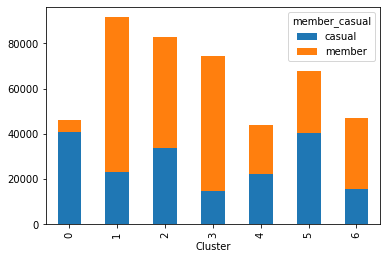

In [ ]:
df2_total.groupby(['Cluster'])['member_casual'].value_counts().unstack().plot(kind='bar',stacked = True);

Member_casual

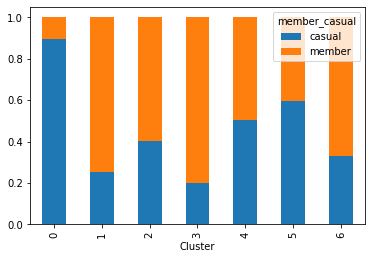

In [ ]:
df2_total.groupby(['Cluster'])['member_casual'].value_counts(normalize=True).unstack().plot(kind='bar',stacked = True);

In [ ]:
df2_total['member_casual'].value_counts(normalize=True)

member    0.579948
casual    0.420052
Name: member_casual, dtype: float64

Day

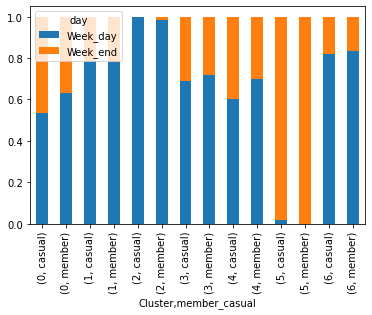

In [ ]:
df2_total.groupby(['Cluster','member_casual'])['day'].value_counts(normalize=True).unstack().plot(kind='bar',stacked = True);

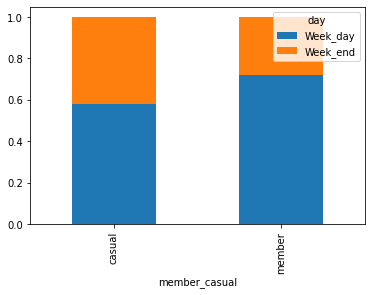

In [ ]:
df2_total.groupby(['member_casual'])['day'].value_counts(normalize=True).unstack().plot(kind='bar',stacked = True);

Hour

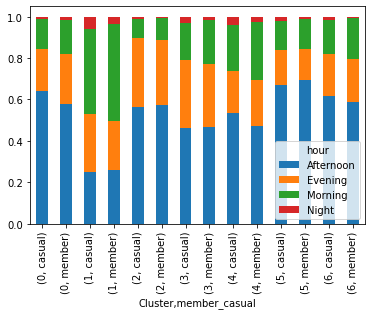

In [ ]:
df2_total.groupby(['Cluster','member_casual'])['hour'].value_counts(normalize=True).unstack().plot(kind='bar',stacked = True);

In [ ]:
df2_total.groupby(['Cluster','member_casual'])['hour'].value_counts(normalize=True)

Cluster  member_casual  hour     
0        casual         Afternoon    0.642469
                        Evening      0.199868
                        Morning      0.144967
                        Night        0.012696
         member         Afternoon    0.579451
                        Evening      0.241913
                        Morning      0.163784
                        Night        0.014852
1        casual         Morning      0.411449
                        Evening      0.278006
                        Afternoon    0.250746
                        Night        0.059798
         member         Morning      0.467734
                        Afternoon    0.258408
                        Evening      0.237755
                        Night        0.036103
2        casual         Afternoon    0.564720
                        Evening      0.330703
                        Morning      0.094304
                        Night        0.010273
         member         Afternoon    0.571986


In [ ]:
df2_total.groupby(['member_casual'])['hour'].value_counts(normalize=True)

member_casual  hour     
casual         Afternoon    0.558325
               Evening      0.236654
               Morning      0.180456
               Night        0.024565
member         Afternoon    0.472088
               Evening      0.254178
               Morning      0.254068
               Night        0.019666
Name: hour, dtype: float64

Ride_type

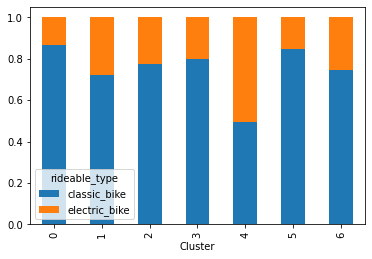

In [ ]:
df2_total.groupby(['Cluster'])['rideable_type'].value_counts(normalize=True).unstack().plot(kind='bar',stacked = True);

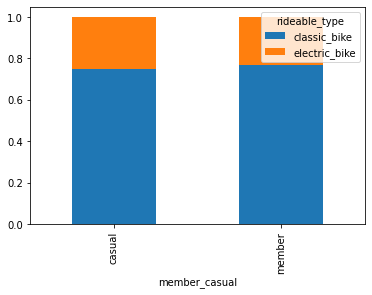

In [ ]:
df2_total.groupby(['member_casual'])['rideable_type'].value_counts(normalize=True).unstack().plot(kind='bar',stacked = True);

Contitions

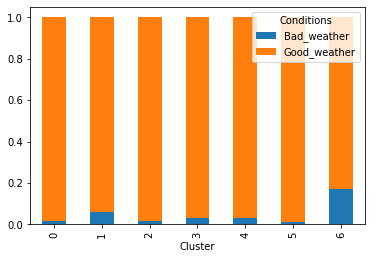

In [ ]:
df2_total.groupby(['Cluster'])['Conditions'].value_counts(normalize=True).unstack().plot(kind='bar',stacked = True);

In [ ]:
df2_total.groupby(['Cluster'])['Conditions'].value_counts(normalize=True)

Cluster  Conditions  
0        Good_weather    0.984941
         Bad_weather     0.015059
1        Good_weather    0.941973
         Bad_weather     0.058027
2        Good_weather    0.985382
         Bad_weather     0.014618
3        Good_weather    0.970010
         Bad_weather     0.029990
4        Good_weather    0.969985
         Bad_weather     0.030015
5        Good_weather    0.987311
         Bad_weather     0.012689
6        Good_weather    0.830347
         Bad_weather     0.169653
Name: Conditions, dtype: float64

In [ ]:
df2_total['Conditions'].value_counts(normalize=True)

Good_weather    0.956779
Bad_weather     0.043221
Name: Conditions, dtype: float64

In [ ]:
percentage_clear = df2_total.groupby(['Conditions', 'Cluster'])['member_casual'].value_counts(normalize=True)['Good_weather']
percentage_rain = df2_total.groupby(['Conditions', 'Cluster'])['member_casual'].value_counts(normalize=True)['Bad_weather']

In [ ]:
casual_percentages = pd.DataFrame({'casual_percentage_clear': np.zeros(6),'casual_percentage_rain': np.zeros(6)}, index = range(6) )
for i in range(7):
  casual_percentages.loc[i,'casual_percentage_clear'] = percentage_clear[i]['casual']
  casual_percentages.loc[i,'casual_percentage_rain'] = percentage_rain[i]['casual']
casual_percentages['percentagepoint_difference'] = casual_percentages['casual_percentage_clear'] - casual_percentages['casual_percentage_rain']

In [ ]:
casual_percentages

,casual_percentage_clear,casual_percentage_rain,percentagepoint_difference
0,0.894476,0.799133,0.095343
1,0.254376,0.222180,0.032195
2,0.405526,0.326194,0.079331
3,0.199102,0.184904,0.014198
4,0.509413,0.408365,0.101048
5,0.596364,0.630966,-0.034602
6,0.338718,0.277158,0.061560


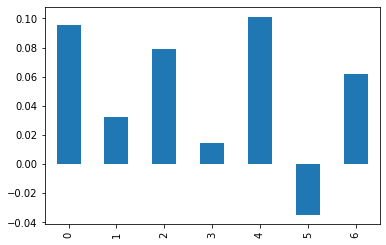

In [ ]:
casual_percentages['percentagepoint_difference'].plot(kind='bar',stacked = True);

Average Duration

In [ ]:
df2_total.groupby(['Cluster'])[['Duration']].mean()

,Duration
Cluster,
0,4367.982003
1,693.644549
2,973.065141
3,310.850172
4,2139.525621
5,1186.687470
6,784.717131


Distance

In [ ]:
df2_total.groupby(['Cluster'])[['distance']].mean()

,distance
Cluster,
0,0.607152
1,1.726995
2,2.136196
3,0.750885
4,5.329871
5,2.159892
6,1.667090


Direction_Outwards

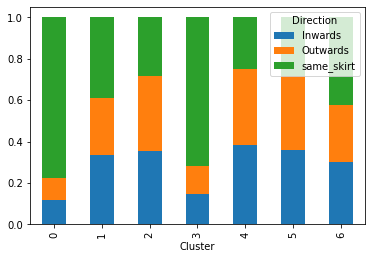

In [ ]:
df2_total.groupby(['Cluster'])['Direction'].value_counts(normalize=True).unstack().plot(kind='bar',stacked = True);

In [ ]:
df2_total.groupby(['Cluster'])['Direction'].value_counts(normalize=True)

Cluster  Direction 
0        same_skirt    0.775940
         Inwards       0.117253
         Outwards      0.106807
1        same_skirt    0.388491
         Inwards       0.335653
         Outwards      0.275856
2        Outwards      0.357696
         Inwards       0.356961
         same_skirt    0.285343
3        same_skirt    0.717703
         Inwards       0.149078
         Outwards      0.133219
4        Inwards       0.384926
         Outwards      0.364794
         same_skirt    0.250280
5        Inwards       0.361335
         Outwards      0.355057
         same_skirt    0.283608
6        same_skirt    0.422146
         Inwards       0.301575
         Outwards      0.276279
Name: Direction, dtype: float64

Trips

In [ ]:
df3_total = df2_total[['Cluster', 'trip']].copy()
df3_total = pd.get_dummies(df3_total, 'trip')
df3_total

,Cluster,trip_0-0,trip_1-0,trip_1-1,trip_10-0,trip_10-1,trip_10-10,trip_10-2,trip_10-5,trip_10-6,trip_10-7,trip_10-8,trip_10-9,trip_2-0,trip_2-1,trip_2-2,trip_5-0,trip_5-1,trip_5-2,trip_5-5,trip_6-0,trip_6-1,trip_6-2,trip_6-5,trip_6-6,trip_7-0,trip_7-1,trip_7-2,trip_7-5,trip_7-6,trip_7-7,trip_8-0,trip_8-1,trip_8-2,trip_8-5,trip_8-6,trip_8-7,trip_8-8,trip_9-0,trip_9-1,trip_9-2,trip_9-5,trip_9-6,trip_9-7,trip_9-8,trip_9-9
0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
453736,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
453737,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
453738,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
453739,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
df3_total =df3_total.groupby(['Cluster'])['trip_0-0',	'trip_1-0',	'trip_1-1',	'trip_10-0',	'trip_10-1',	'trip_10-10',	'trip_10-2',	'trip_10-5',	'trip_10-6',	'trip_10-7',	'trip_10-8',	'trip_10-9',	'trip_2-0',	'trip_2-1',	'trip_2-2',	'trip_5-0',	'trip_5-1',	'trip_5-2',	'trip_5-5',	'trip_6-0', 'trip_6-1',	'trip_6-2',	'trip_6-5',	'trip_6-6',	'trip_7-0',	'trip_7-1',	'trip_7-2',	'trip_7-5',	'trip_7-6',	'trip_7-7',	'trip_8-0',	'trip_8-1',	'trip_8-2',	'trip_8-5',	'trip_8-6',	'trip_8-7',	'trip_8-8',	'trip_9-0',	'trip_9-1',	'trip_9-2',	'trip_9-5',	'trip_9-6',	'trip_9-7',	'trip_9-8',	'trip_9-9'].mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


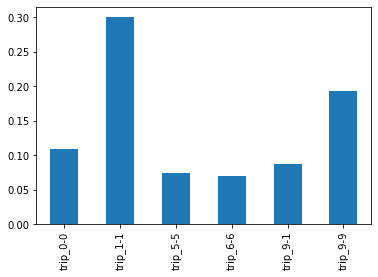

In [ ]:
df3_total.loc[0,df3_total.loc[0,:]>=0.05].plot(kind= 'bar');

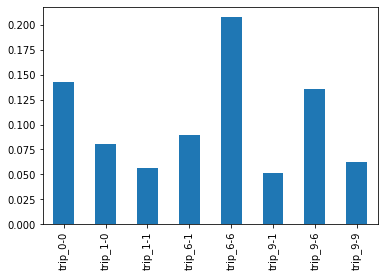

In [ ]:
df3_total.loc[1,df3_total.loc[1,:]>=0.05].plot(kind= 'bar');

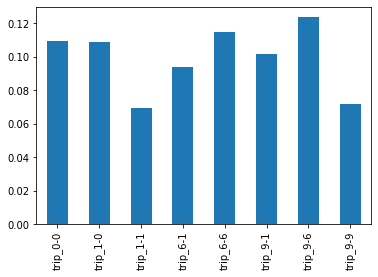

In [ ]:
df3_total.loc[2,df3_total.loc[2,:]>=0.05].plot(kind= 'bar');

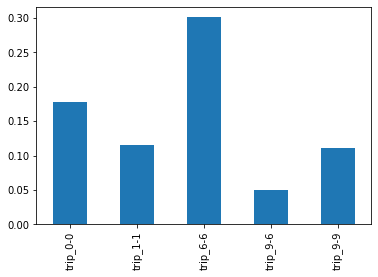

In [ ]:
df3_total.loc[3,df3_total.loc[3,:]>=0.05].plot(kind= 'bar');

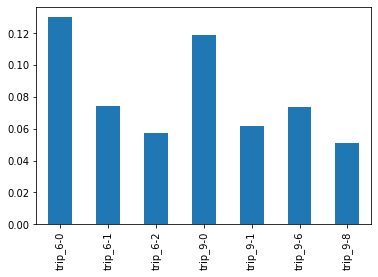

In [ ]:
df3_total.loc[4,df3_total.loc[4,:]>=0.05].plot(kind= 'bar');

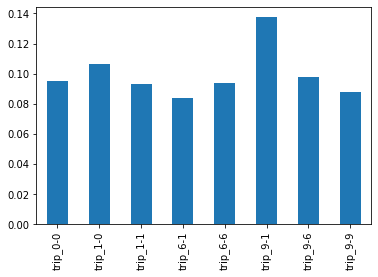

In [ ]:
df3_total.loc[5,df3_total.loc[5,:]>=0.05].plot(kind= 'bar');

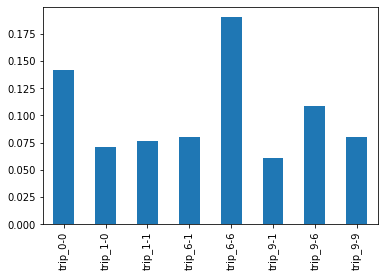

In [ ]:
df3_total.loc[6,df3_total.loc[6,:]>=0.05].plot(kind= 'bar');

Wind_prec

In [ ]:
df2_total.groupby(['Cluster'])[['prec_wind']].mean()

,prec_wind
Cluster,
0,0.789775
1,0.614496
2,0.885026
3,0.721972
4,0.784842
5,0.653714
6,1.741057


Temperature

In [ ]:
df2_total.groupby(['Cluster'])[['Temperature']].mean()

,Temperature
Cluster,
0,16.454274
1,5.776710
2,20.384541
3,15.814989
4,13.820616
5,15.801934
6,10.493395


#Members_ PCA

In [ ]:
df_members_pca = df_members_backup.copy()
df_casuals_pca = df_casuals_backup.copy()

In [ ]:
df_members_pca = pd.get_dummies(df_members_pca, columns=['rideable_type', 'member_casual', 'Conditions', 'hour', 'day', 'Direction'])
df_casuals_pca = pd.get_dummies(df_casuals_pca, columns=['rideable_type', 'member_casual', 'Conditions', 'hour', 'day', 'Direction'])

df_casuals_pca

,distance,Precipitation,Temperature,Wind Speed,Duration,Duration_log,closest distrect from start copy,closest distrect from end copy,cluster_start,cluster_end,trip_skirt_dist,trip,prec_wind,rideable_type_classic_bike,rideable_type_electric_bike,member_casual_casual,Conditions_Bad_weather,Conditions_Good_weather,hour_Afternoon,hour_Evening,hour_Morning,hour_Night,day_Week_day,day_Week_end,Direction_Inwards,Direction_Outwards,Direction_same_skirt
2,1.299628,0.00,0.0,23.4,1091.0,6.994850,skirt2,outskirt,6,6,skirt2-outskirt,6-6,1.1700,1,0,1,1,0,1,0,0,0,1,0,0,1,0
4,2.353002,0.00,0.5,22.6,460.0,6.131226,skirt2,outskirt,6,2,skirt2-outskirt,6-2,1.1300,0,1,1,1,0,1,0,0,0,1,0,0,1,0
9,1.620970,0.43,0.5,25.6,547.0,6.304449,skirt2,outskirt,6,6,skirt2-outskirt,6-6,1.6885,0,1,1,1,0,0,1,0,0,1,0,0,1,0
12,4.553349,0.37,1.0,24.7,1575.0,7.362011,skirt2,outskirt,6,2,skirt2-outskirt,6-2,1.5865,1,0,1,1,0,0,1,0,0,1,0,0,1,0
14,1.408743,0.02,1.6,28.1,735.0,6.599870,skirt2,outskirt,6,6,skirt2-outskirt,6-6,1.4240,0,1,1,1,0,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
453731,7.507479,0.00,18.3,9.8,2779.0,7.929846,skirt2,outskirt,1,5,skirt2-outskirt,5-1,0.4900,1,0,1,0,1,1,0,0,0,0,1,0,1,0
453732,9.531980,0.00,12.8,23.6,3130.0,8.048788,skirt2,outskirt,1,5,skirt2-outskirt,5-1,1.1800,0,1,1,0,1,0,0,1,0,1,0,0,1,0
453737,8.531933,0.00,15.5,22.1,2508.0,7.827241,skirt2,outskirt,1,5,skirt2-outskirt,5-1,1.1050,1,0,1,0,1,1,0,0,0,1,0,0,1,0
453738,8.513730,0.00,19.0,10.8,1477.0,7.297768,skirt2,outskirt,1,5,skirt2-outskirt,5-1,0.5400,0,1,1,0,1,0,0,1,0,1,0,0,1,0


In [ ]:
df_members_pca

,distance,Precipitation,Temperature,Wind Speed,Duration,Duration_log,closest distrect from start copy,closest distrect from end copy,cluster_start,cluster_end,trip_skirt_dist,trip,prec_wind,rideable_type_classic_bike,rideable_type_electric_bike,member_casual_member,Conditions_Bad_weather,Conditions_Good_weather,hour_Afternoon,hour_Evening,hour_Morning,hour_Night,day_Week_day,day_Week_end,Direction_Inwards,Direction_Outwards,Direction_same_skirt
0,4.229135,0.00,-0.7,25.3,3426.0,8.139149,skirt2,outskirt,6,2,skirt2-outskirt,6-2,1.265,0,1,1,0,1,0,0,0,1,1,0,0,1,0
1,2.501071,0.00,-1.6,26.5,633.0,6.450470,skirt2,outskirt,6,6,skirt2-outskirt,6-6,1.325,1,0,1,1,0,0,0,1,0,1,0,0,1,0
3,1.640299,0.00,0.5,22.6,292.0,5.676754,skirt2,outskirt,6,6,skirt2-outskirt,6-6,1.130,0,1,1,1,0,1,0,0,0,1,0,0,1,0
5,1.033987,0.18,-0.1,20.2,560.0,6.327937,skirt2,outskirt,6,6,skirt2-outskirt,6-6,1.181,0,1,1,1,0,1,0,0,0,1,0,0,1,0
6,0.921083,0.18,-0.1,20.2,793.0,6.675823,skirt2,outskirt,6,6,skirt2-outskirt,6-6,1.181,1,0,1,1,0,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
453733,5.662722,0.00,15.6,15.5,1508.0,7.318540,skirt2,outskirt,1,5,skirt2-outskirt,5-1,0.775,1,0,1,0,1,1,0,0,0,1,0,0,1,0
453734,7.507479,0.00,18.3,16.5,1862.0,7.529406,skirt2,outskirt,1,5,skirt2-outskirt,5-1,0.825,1,0,1,0,1,1,0,0,0,0,1,0,1,0
453735,6.849916,0.00,16.2,14.4,2139.0,7.668094,skirt2,outskirt,1,5,skirt2-outskirt,5-1,0.720,1,0,1,0,1,1,0,0,0,0,1,0,1,0
453736,10.719479,0.00,18.3,22.6,2833.0,7.949091,skirt2,outskirt,1,5,skirt2-outskirt,5-1,1.130,1,0,1,0,1,1,0,0,0,0,1,0,1,0


In [ ]:
df_members_pca.drop(['trip_skirt_dist','closest distrect from start copy','closest distrect from end copy', 'cluster_start', "cluster_end", 'Duration'], axis = 1, inplace = True)
df_casuals_pca.drop(['trip_skirt_dist','closest distrect from start copy','closest distrect from end copy', 'cluster_start', "cluster_end", 'Duration'], axis = 1, inplace = True)

In [ ]:
from sklearn.preprocessing import StandardScaler
# define standard scaler
scaler = StandardScaler()
# transform data for members
scaled = scaler.fit_transform(df_members_pca[['Temperature','Duration_log', 'distance', 'prec_wind']])
df_members[['Temperature','Duration_log', 'distance', 'prec_wind']] = scaled

scaler = StandardScaler()
# transform data for casuals
scaled = scaler.fit_transform(df_casuals_pca[['Temperature','Duration_log', 'distance', 'prec_wind']])
df_casuals[['Temperature','Duration_log', 'distance', 'prec_wind']] = scaled


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1734: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation:

In [ ]:
df_members_pca.drop(['Wind Speed', 'Precipitation'], axis= 1, inplace= True)
df_casuals_pca.drop(['Wind Speed', 'Precipitation'], axis= 1, inplace= True)

In [ ]:
df2_members_pca = df_members_pca['trip']
df2_members_pca = pd.get_dummies(df2_members_pca, 'trip')

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.decomposition import PCA
import scipy.cluster.hierarchy as hc
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering

#
# Reduce the dimensionality of data to 3 features
#
pca = PCA(n_components=5)
df_pca = pca.fit_transform(df2_members_pca)
df_pca = pd.DataFrame(df_pca)
df_pca.columns = ['P1', 'P2', 'P3', 'P4', 'P5']

In [ ]:
df_pca

,P1,P2,P3,P4,P5
0,-0.098275,-0.085023,-0.084629,-0.044126,-0.021132
1,0.825058,0.141100,0.074031,0.024816,0.009795
2,0.825058,0.141100,0.074031,0.024816,0.009795
3,0.825058,0.141100,0.074031,0.024816,0.009795
4,0.825058,0.141100,0.074031,0.024816,0.009795
...,...,...,...,...,...
263141,-0.093252,-0.078935,-0.076696,-0.038886,-0.018400
263142,-0.093252,-0.078935,-0.076696,-0.038886,-0.018400
263143,-0.093252,-0.078935,-0.076696,-0.038886,-0.018400
263144,-0.093252,-0.078935,-0.076696,-0.038886,-0.018400


In [ ]:
df_members_pca = pd.concat((df_members_pca.reset_index(), df_pca.reset_index()), axis = 1 )

In [ ]:
df_members_pca

,index,distance,Temperature,Duration_log,trip,prec_wind,rideable_type_classic_bike,rideable_type_electric_bike,member_casual_member,Conditions_Bad_weather,Conditions_Good_weather,hour_Afternoon,hour_Evening,hour_Morning,hour_Night,day_Week_day,day_Week_end,Direction_Inwards,Direction_Outwards,Direction_same_skirt,index,P1,P2,P3,P4,P5
0,0,4.229135,-0.7,8.139149,6-2,1.265,0,1,1,0,1,0,0,0,1,1,0,0,1,0,0,-0.098275,-0.085023,-0.084629,-0.044126,-0.021132
1,1,2.501071,-1.6,6.450470,6-6,1.325,1,0,1,1,0,0,0,1,0,1,0,0,1,0,1,0.825058,0.141100,0.074031,0.024816,0.009795
2,3,1.640299,0.5,5.676754,6-6,1.130,0,1,1,1,0,1,0,0,0,1,0,0,1,0,2,0.825058,0.141100,0.074031,0.024816,0.009795
3,5,1.033987,-0.1,6.327937,6-6,1.181,0,1,1,1,0,1,0,0,0,1,0,0,1,0,3,0.825058,0.141100,0.074031,0.024816,0.009795
4,6,0.921083,-0.1,6.675823,6-6,1.181,1,0,1,1,0,1,0,0,0,1,0,0,1,0,4,0.825058,0.141100,0.074031,0.024816,0.009795
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263141,453733,5.662722,15.6,7.318540,5-1,0.775,1,0,1,0,1,1,0,0,0,1,0,0,1,0,263141,-0.093252,-0.078935,-0.076696,-0.038886,-0.018400
263142,453734,7.507479,18.3,7.529406,5-1,0.825,1,0,1,0,1,1,0,0,0,0,1,0,1,0,263142,-0.093252,-0.078935,-0.076696,-0.038886,-0.018400
263143,453735,6.849916,16.2,7.668094,5-1,0.720,1,0,1,0,1,1,0,0,0,0,1,0,1,0,263143,-0.093252,-0.078935,-0.076696,-0.038886,-0.018400
263144,453736,10.719479,18.3,7.949091,5-1,1.130,1,0,1,0,1,1,0,0,0,0,1,0,1,0,263144,-0.093252,-0.078935,-0.076696,-0.038886,-0.018400


In [ ]:
df_members_pca.drop('trip', axis= 1, inplace= True)
df_members_pca

,index,distance,Temperature,Duration_log,prec_wind,rideable_type_classic_bike,rideable_type_electric_bike,member_casual_member,Conditions_Bad_weather,Conditions_Good_weather,hour_Afternoon,hour_Evening,hour_Morning,hour_Night,day_Week_day,day_Week_end,Direction_Inwards,Direction_Outwards,Direction_same_skirt,index,P1,P2,P3,P4,P5
0,0,4.229135,-0.7,8.139149,1.265,0,1,1,0,1,0,0,0,1,1,0,0,1,0,0,-0.098275,-0.085023,-0.084629,-0.044126,-0.021132
1,1,2.501071,-1.6,6.450470,1.325,1,0,1,1,0,0,0,1,0,1,0,0,1,0,1,0.825058,0.141100,0.074031,0.024816,0.009795
2,3,1.640299,0.5,5.676754,1.130,0,1,1,1,0,1,0,0,0,1,0,0,1,0,2,0.825058,0.141100,0.074031,0.024816,0.009795
3,5,1.033987,-0.1,6.327937,1.181,0,1,1,1,0,1,0,0,0,1,0,0,1,0,3,0.825058,0.141100,0.074031,0.024816,0.009795
4,6,0.921083,-0.1,6.675823,1.181,1,0,1,1,0,1,0,0,0,1,0,0,1,0,4,0.825058,0.141100,0.074031,0.024816,0.009795
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263141,453733,5.662722,15.6,7.318540,0.775,1,0,1,0,1,1,0,0,0,1,0,0,1,0,263141,-0.093252,-0.078935,-0.076696,-0.038886,-0.018400
263142,453734,7.507479,18.3,7.529406,0.825,1,0,1,0,1,1,0,0,0,0,1,0,1,0,263142,-0.093252,-0.078935,-0.076696,-0.038886,-0.018400
263143,453735,6.849916,16.2,7.668094,0.720,1,0,1,0,1,1,0,0,0,0,1,0,1,0,263143,-0.093252,-0.078935,-0.076696,-0.038886,-0.018400
263144,453736,10.719479,18.3,7.949091,1.130,1,0,1,0,1,1,0,0,0,0,1,0,1,0,263144,-0.093252,-0.078935,-0.076696,-0.038886,-0.018400


Kmeans on Members

In [ ]:
from sklearn.cluster import KMeans
# objective function is nothing but argmin of c (sum of (|x-c|)^2 )  c: centroid ,x=point in data set
objective_function=[] 
for i in range(1,10):
    clustering=KMeans(n_clusters=i, init='k-means++')
    clustering.fit(df_members_pca)
    objective_function.append(clustering.inertia_)
#inertia is calculaing min intra cluster distance
# objective function contains min intra cluster distances 
objective_function

[5932293616746076.0,
 1448988916168868.0,
 661187028413236.0,
 390429323541785.9,
 239813653308480.94,
 170163574825396.0,
 120773020433582.48,
 91392359552500.81,
 71216438630222.81]

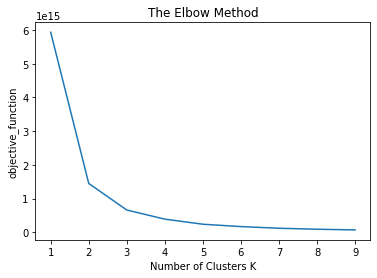

In [ ]:
import matplotlib.pyplot as plt 

plt.plot(range(1,10),objective_function)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters K')
plt.ylabel('objective_function')
plt.show()

In [ ]:
# Training the model with optimal no of clusters
tuned_clustering=KMeans(n_clusters=3,init='k-means++',random_state=0)
labels=tuned_clustering.fit_predict(df_members_pca)
# x and y  coordinates of all clusters
# Centroids of clusters
tuned_clustering.cluster_centers_[:]

array([[ 3.65782631e+05,  1.93817696e+00,  1.35525474e+01,
         6.49181560e+00,  8.48279375e-01,  7.96199244e-01,
         2.03800756e-01,  1.00000000e+00,  4.90921318e-02,
         9.50907868e-01,  4.95733135e-01,  2.56162605e-01,
         2.29935301e-01,  1.81689586e-02,  6.96496069e-01,
         3.03503931e-01,  2.09064768e-01,  3.42891265e-01,
         4.48043967e-01,  2.20022500e+05, -1.56022581e-01,
         1.07823653e-01, -8.79046420e-02, -2.35332752e-02,
         5.97395290e-02],
       [ 7.11856158e+04,  1.74966620e+00,  1.28718946e+01,
         6.32837090e+00,  8.48573805e-01,  7.12459660e-01,
         2.87540340e-01,  1.00000000e+00,  5.67508279e-02,
         9.43249172e-01,  4.56421776e-01,  2.84808792e-01,
         2.37918961e-01,  2.08504714e-02,  7.23681158e-01,
         2.76318842e-01,  3.71975785e-01,  2.41314940e-01,
         3.86709275e-01,  4.74085000e+04,  2.66479341e-01,
        -3.33212219e-02,  6.31643299e-02,  6.60933162e-02,
         6.64093859e-03],
    

In [ ]:
df_members_pca = pd.concat((pd.DataFrame(labels), df_members_backup.reset_index()), axis = 1)
df_members_pca.rename({0:'Cluster'}, axis = 1, inplace= True)

df_members_pca

,Cluster,index,rideable_type,member_casual,distance,Precipitation,Temperature,Wind Speed,Conditions,Duration,Duration_log,closest distrect from start copy,closest distrect from end copy,cluster_start,cluster_end,hour,day,trip_skirt_dist,trip,Direction,prec_wind
0,1,0,electric_bike,member,4.229135,0.00,-0.7,25.3,Good_weather,3426.0,8.139149,skirt2,outskirt,6,2,Night,Week_day,skirt2-outskirt,6-2,Outwards,1.265
1,1,1,classic_bike,member,2.501071,0.00,-1.6,26.5,Bad_weather,633.0,6.450470,skirt2,outskirt,6,6,Morning,Week_day,skirt2-outskirt,6-6,Outwards,1.325
2,1,3,electric_bike,member,1.640299,0.00,0.5,22.6,Bad_weather,292.0,5.676754,skirt2,outskirt,6,6,Afternoon,Week_day,skirt2-outskirt,6-6,Outwards,1.130
3,1,5,electric_bike,member,1.033987,0.18,-0.1,20.2,Bad_weather,560.0,6.327937,skirt2,outskirt,6,6,Afternoon,Week_day,skirt2-outskirt,6-6,Outwards,1.181
4,1,6,classic_bike,member,0.921083,0.18,-0.1,20.2,Bad_weather,793.0,6.675823,skirt2,outskirt,6,6,Afternoon,Week_day,skirt2-outskirt,6-6,Outwards,1.181
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263141,0,453733,classic_bike,member,5.662722,0.00,15.6,15.5,Good_weather,1508.0,7.318540,skirt2,outskirt,1,5,Afternoon,Week_day,skirt2-outskirt,5-1,Outwards,0.775
263142,0,453734,classic_bike,member,7.507479,0.00,18.3,16.5,Good_weather,1862.0,7.529406,skirt2,outskirt,1,5,Afternoon,Week_end,skirt2-outskirt,5-1,Outwards,0.825
263143,0,453735,classic_bike,member,6.849916,0.00,16.2,14.4,Good_weather,2139.0,7.668094,skirt2,outskirt,1,5,Afternoon,Week_end,skirt2-outskirt,5-1,Outwards,0.720
263144,0,453736,classic_bike,member,10.719479,0.00,18.3,22.6,Good_weather,2833.0,7.949091,skirt2,outskirt,1,5,Afternoon,Week_end,skirt2-outskirt,5-1,Outwards,1.130


In [ ]:
import matplotlib.pyplot as plt
x = df_members_pca.groupby(['Cluster'])[ 'Conditions'].value_counts(normalize=True)
x

Cluster  Conditions  
0        Good_weather    0.950941
         Bad_weather     0.049059
1        Good_weather    0.943205
         Bad_weather     0.056795
2        Good_weather    0.949304
         Bad_weather     0.050696
Name: Conditions, dtype: float64

Day

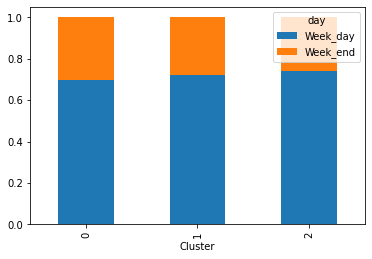

In [ ]:
df_members_pca.groupby(['Cluster'])['day'].value_counts(normalize=True).unstack().plot(kind='bar',stacked = True);

Hour

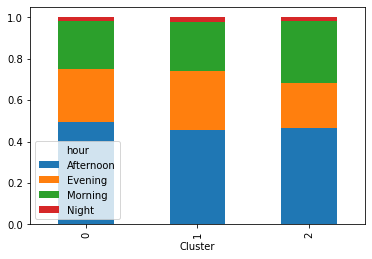

In [ ]:
df_members_pca.groupby(['Cluster'])['hour'].value_counts(normalize=True).unstack().plot(kind='bar',stacked = True);

Ride_type

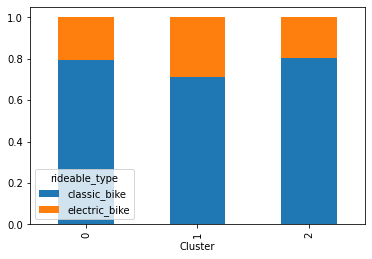

In [ ]:
df_members_pca.groupby(['Cluster'])['rideable_type'].value_counts(normalize=True).unstack().plot(kind='bar',stacked = True);

Contitions

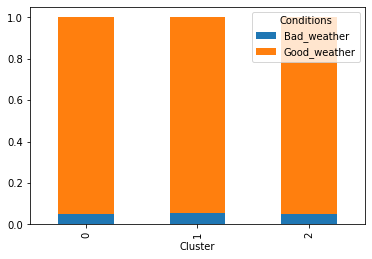

In [ ]:
df_members_pca.groupby(['Cluster'])['Conditions'].value_counts(normalize=True).unstack().plot(kind='bar',stacked = True);

Average Duration

In [ ]:
df_members_pca.groupby(['Cluster'])[['Duration']].mean()

,Duration
Cluster,
0,888.836659
1,782.396574
2,851.082146


Distance

In [ ]:
df_members_pca.groupby(['Cluster'])[['distance']].mean()

,distance
Cluster,
0,1.940053
1,1.750306
2,2.046482


Direction_Outwards

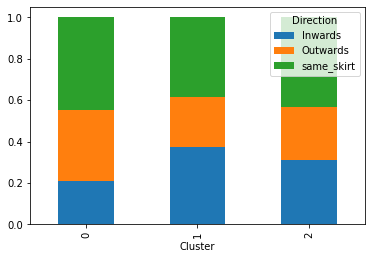

In [ ]:
df_members_pca.groupby(['Cluster'])['Direction'].value_counts(normalize=True).unstack().plot(kind='bar',stacked = True);

Trips

In [ ]:
df3_members = df2_members[['Cluster', 'trip']].copy()
df3_members = pd.get_dummies(df3_members, 'trip')
df3_members

,Cluster,trip_0-0,trip_1-0,trip_1-1,trip_10-0,trip_10-1,trip_10-10,trip_10-2,trip_10-5,trip_10-6,trip_10-7,trip_10-8,trip_10-9,trip_2-0,trip_2-1,trip_2-2,trip_5-0,trip_5-1,trip_5-2,trip_5-5,trip_6-0,trip_6-1,trip_6-2,trip_6-5,trip_6-6,trip_7-0,trip_7-1,trip_7-2,trip_7-5,trip_7-6,trip_7-7,trip_8-0,trip_8-1,trip_8-2,trip_8-5,trip_8-6,trip_8-7,trip_8-8,trip_9-0,trip_9-1,trip_9-2,trip_9-5,trip_9-6,trip_9-7,trip_9-8,trip_9-9
0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263141,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
263142,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
263143,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
263144,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
df3_members =df3_members.groupby(['Cluster'])['trip_0-0',	'trip_1-0',	'trip_1-1',	'trip_10-0',	'trip_10-1',	'trip_10-10',	'trip_10-2',	'trip_10-5',	'trip_10-6',	'trip_10-7',	'trip_10-8',	'trip_10-9',	'trip_2-0',	'trip_2-1',	'trip_2-2',	'trip_5-0',	'trip_5-1',	'trip_5-2',	'trip_5-5',	'trip_6-0', 'trip_6-1',	'trip_6-2',	'trip_6-5',	'trip_6-6',	'trip_7-0',	'trip_7-1',	'trip_7-2',	'trip_7-5',	'trip_7-6',	'trip_7-7',	'trip_8-0',	'trip_8-1',	'trip_8-2',	'trip_8-5',	'trip_8-6',	'trip_8-7',	'trip_8-8',	'trip_9-0',	'trip_9-1',	'trip_9-2',	'trip_9-5',	'trip_9-6',	'trip_9-7',	'trip_9-8',	'trip_9-9'].mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


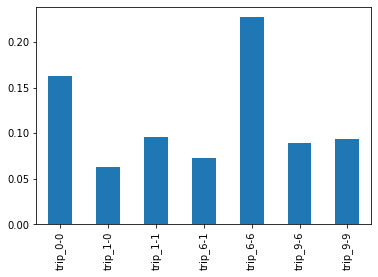

In [ ]:
df3_members.loc[0,df3_members.loc[0,:]>=0.05].plot(kind= 'bar');

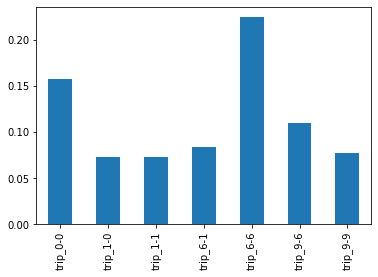

In [ ]:
df3_members.loc[1,df3_members.loc[1,:]>=0.05].plot(kind= 'bar');

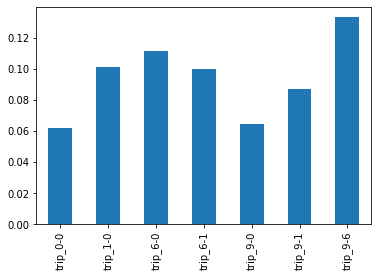

In [ ]:
df3_members.loc[2,df3_members.loc[2,:]>=0.05].plot(kind= 'bar');

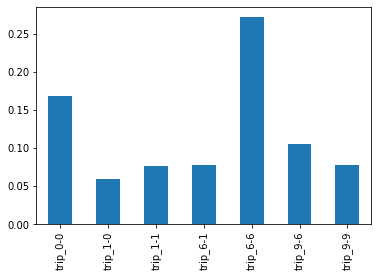

In [ ]:
df3_members.loc[3,df3_members.loc[3,:]>=0.05].plot(kind= 'bar');

Wind_prec

In [ ]:
df_members_pca.groupby(['Cluster'])[['prec_wind']].mean()

,prec_wind
Cluster,
0,0.848206
1,0.848554
2,0.839787


Temperature

In [ ]:
df_members_pca.groupby(['Cluster'])[['Temperature']].mean()

,Temperature
Cluster,
0,13.553962
1,12.865892
2,13.303853


K-means on casuals

In [ ]:
from sklearn.cluster import KMeans
# objective function is nothing but argmin of c (sum of (|x-c|)^2 )  c: centroid ,x=point in data set
objective_function=[] 
for i in range(1,10):
    clustering=KMeans(n_clusters=i, init='k-means++')
    clustering.fit(df_casuals)
    objective_function.append(clustering.inertia_)
#inertia is calculaing min intra cluster distance
# objective function contains min intra cluster distances 
objective_function

[1351400.319347314,
 1193104.0396115277,
 1084816.6234055674,
 1005607.431600425,
 949745.2676490007,
 910655.7645648131,
 877246.8371283587,
 853170.2391046071,
 835297.9829667832]

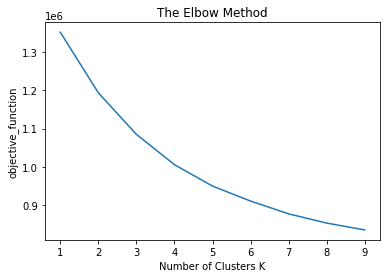

In [ ]:
import matplotlib.pyplot as plt 

plt.plot(range(1,10),objective_function)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters K')
plt.ylabel('objective_function')
plt.show()

In [ ]:
# Training the model with optimal no of clusters
tuned_clustering=KMeans(n_clusters=4,init='k-means++',random_state=0)
labels=tuned_clustering.fit_predict(df_casuals)
# x and y  coordinates of all clusters
# Centroids of clusters
tuned_clustering.cluster_centers_[:]

array([[ 1.61689762e+00,  2.22706956e-02,  5.34028295e-01,
        -1.61289729e-01,  6.18669620e-01,  3.81330380e-01,
         1.00000000e+00,  2.10140914e-02,  9.78985909e-01,
         5.78056735e-01,  2.01864501e-01,  1.88696080e-01,
         3.13826841e-02,  5.01907575e-01,  4.98092425e-01,
         3.77422928e-01,  3.71915574e-01,  2.50661498e-01,
         2.81521137e-02,  7.39031444e-02,  5.53812073e-03,
         1.55375054e-02,  6.98418559e-03,  1.93834226e-03,
         7.99950772e-04,  3.38440711e-03,  8.61485447e-03,
         3.99975386e-04,  2.76906037e-04,  4.89200665e-03,
         1.90757492e-02,  1.09839394e-02,  9.99938465e-03,
         5.78425943e-03,  3.09519414e-02,  1.23069350e-04,
         2.28908990e-02,  1.10639345e-01,  8.01796813e-02,
         4.91354378e-02,  8.33794843e-03,  6.33807150e-03,
         2.43061965e-03,  1.55067380e-02,  3.69208049e-04,
         1.29530490e-02,  1.10762415e-02,  5.32274937e-03,
         2.64599102e-03,  4.64586795e-03,  4.43049658e-0

In [ ]:
df2_casuals = pd.concat((pd.DataFrame(labels), df_casuals_backup.reset_index()), axis = 1)
df2_casuals.rename({0:'Cluster'}, axis = 1, inplace= True)

df2_casuals

,Cluster,index,rideable_type,member_casual,distance,Precipitation,Temperature,Wind Speed,Conditions,Duration,Duration_log,closest distrect from start copy,closest distrect from end copy,cluster_start,cluster_end,hour,day,trip_skirt_dist,trip,Direction,prec_wind
0,2,2,classic_bike,casual,1.299628,0.00,0.0,23.4,Bad_weather,1091.0,6.994850,skirt2,outskirt,6,6,Afternoon,Week_day,skirt2-outskirt,6-6,Outwards,1.1700
1,2,4,electric_bike,casual,2.353002,0.00,0.5,22.6,Bad_weather,460.0,6.131226,skirt2,outskirt,6,2,Afternoon,Week_day,skirt2-outskirt,6-2,Outwards,1.1300
2,2,9,electric_bike,casual,1.620970,0.43,0.5,25.6,Bad_weather,547.0,6.304449,skirt2,outskirt,6,6,Evening,Week_day,skirt2-outskirt,6-6,Outwards,1.6885
3,0,12,classic_bike,casual,4.553349,0.37,1.0,24.7,Bad_weather,1575.0,7.362011,skirt2,outskirt,6,2,Evening,Week_day,skirt2-outskirt,6-2,Outwards,1.5865
4,2,14,electric_bike,casual,1.408743,0.02,1.6,28.1,Bad_weather,735.0,6.599870,skirt2,outskirt,6,6,Afternoon,Week_day,skirt2-outskirt,6-6,Outwards,1.4240
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190590,0,453731,classic_bike,casual,7.507479,0.00,18.3,9.8,Good_weather,2779.0,7.929846,skirt2,outskirt,1,5,Afternoon,Week_end,skirt2-outskirt,5-1,Outwards,0.4900
190591,0,453732,electric_bike,casual,9.531980,0.00,12.8,23.6,Good_weather,3130.0,8.048788,skirt2,outskirt,1,5,Morning,Week_day,skirt2-outskirt,5-1,Outwards,1.1800
190592,0,453737,classic_bike,casual,8.531933,0.00,15.5,22.1,Good_weather,2508.0,7.827241,skirt2,outskirt,1,5,Afternoon,Week_day,skirt2-outskirt,5-1,Outwards,1.1050
190593,0,453738,electric_bike,casual,8.513730,0.00,19.0,10.8,Good_weather,1477.0,7.297768,skirt2,outskirt,1,5,Morning,Week_day,skirt2-outskirt,5-1,Outwards,0.5400


In [ ]:
import matplotlib.pyplot as plt
x = df2_casuals.groupby(['Cluster'])[ 'Conditions'].value_counts(normalize=True)
x

Cluster  Conditions  
0        Good_weather    0.978954
         Bad_weather     0.021046
1        Good_weather    0.988721
         Bad_weather     0.011279
2        Good_weather    0.950454
         Bad_weather     0.049546
3        Good_weather    0.968174
         Bad_weather     0.031826
Name: Conditions, dtype: float64

Day

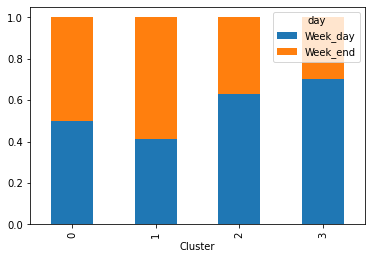

In [ ]:
df2_casuals.groupby(['Cluster'])['day'].value_counts(normalize=True).unstack().plot(kind='bar',stacked = True);

Hour

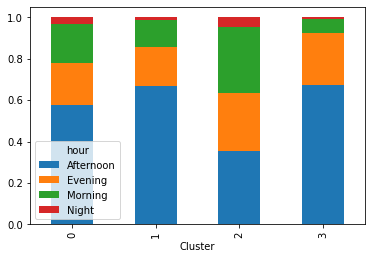

In [ ]:
df2_casuals.groupby(['Cluster'])['hour'].value_counts(normalize=True).unstack().plot(kind='bar',stacked = True);

Ride_type

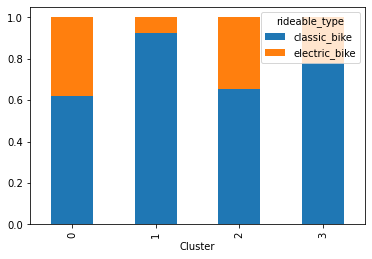

In [ ]:
df2_casuals.groupby(['Cluster'])['rideable_type'].value_counts(normalize=True).unstack().plot(kind='bar',stacked = True);

Contitions

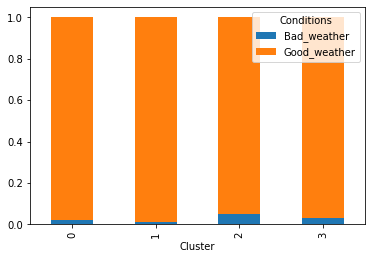

In [ ]:
df2_casuals.groupby(['Cluster'])['Conditions'].value_counts(normalize=True).unstack().plot(kind='bar',stacked = True);

Average Duration

In [ ]:
df2_casuals.groupby(['Cluster'])[['Duration']].mean()

,Duration
Cluster,
0,2316.282523
1,4166.955245
2,760.434806
3,975.832911


Distance

In [ ]:
df2_casuals.groupby(['Cluster'])[['distance']].mean()

,distance
Cluster,
0,4.766948
1,0.841139
2,1.571362
3,1.667198


Direction_Outwards

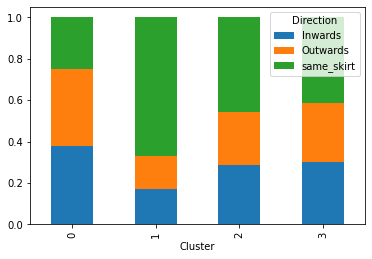

In [ ]:
df2_casuals.groupby(['Cluster'])['Direction'].value_counts(normalize=True).unstack().plot(kind='bar',stacked = True);

Trips

In [ ]:
df3_casuals = df2_casuals[['Cluster', 'trip']].copy()
df3_casuals = pd.get_dummies(df3_casuals, 'trip')
df3_casuals

,Cluster,trip_0-0,trip_1-0,trip_1-1,trip_10-0,trip_10-1,trip_10-10,trip_10-2,trip_10-5,trip_10-6,trip_10-7,trip_10-8,trip_10-9,trip_2-0,trip_2-1,trip_2-2,trip_5-0,trip_5-1,trip_5-2,trip_5-5,trip_6-0,trip_6-1,trip_6-2,trip_6-5,trip_6-6,trip_7-0,trip_7-1,trip_7-2,trip_7-5,trip_7-6,trip_7-7,trip_8-0,trip_8-1,trip_8-2,trip_8-5,trip_8-6,trip_8-7,trip_8-8,trip_9-0,trip_9-1,trip_9-2,trip_9-5,trip_9-6,trip_9-7,trip_9-8,trip_9-9
0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190590,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
190591,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
190592,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
190593,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
df3_casuals =df3_casuals.groupby(['Cluster'])['trip_0-0',	'trip_1-0',	'trip_1-1',	'trip_10-0',	'trip_10-1',	'trip_10-10',	'trip_10-2',	'trip_10-5',	'trip_10-6',	'trip_10-7',	'trip_10-8',	'trip_10-9',	'trip_2-0',	'trip_2-1',	'trip_2-2',	'trip_5-0',	'trip_5-1',	'trip_5-2',	'trip_5-5',	'trip_6-0', 'trip_6-1',	'trip_6-2',	'trip_6-5',	'trip_6-6',	'trip_7-0',	'trip_7-1',	'trip_7-2',	'trip_7-5',	'trip_7-6',	'trip_7-7',	'trip_8-0',	'trip_8-1',	'trip_8-2',	'trip_8-5',	'trip_8-6',	'trip_8-7',	'trip_8-8',	'trip_9-0',	'trip_9-1',	'trip_9-2',	'trip_9-5',	'trip_9-6',	'trip_9-7',	'trip_9-8',	'trip_9-9'].mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


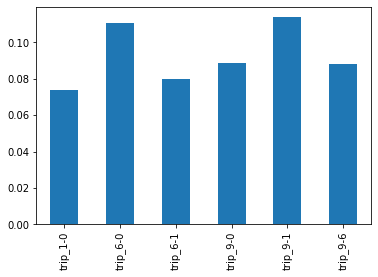

In [ ]:
df3_casuals.loc[0,df3_casuals.loc[0,:]>=0.05].plot(kind= 'bar');

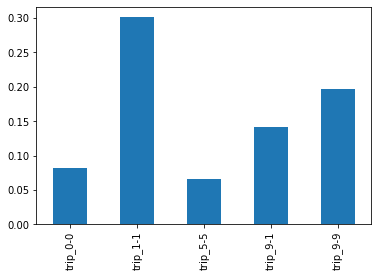

In [ ]:
df3_casuals.loc[1,df3_casuals.loc[1,:]>=0.05].plot(kind= 'bar');

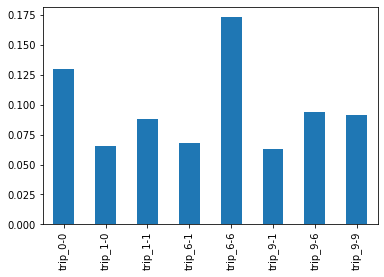

In [ ]:
df3_casuals.loc[2,df3_casuals.loc[2,:]>=0.05].plot(kind= 'bar');

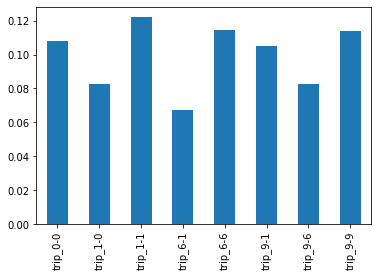

In [ ]:
df3_casuals.loc[3,df3_casuals.loc[3,:]>=0.05].plot(kind= 'bar');

Wind_prec

In [ ]:
df2_casuals.groupby(['Cluster'])[['prec_wind']].mean()

,prec_wind
Cluster,
0,0.748256
1,0.705205
2,0.712516
3,1.095079


Temperature

In [ ]:
df2_casuals.groupby(['Cluster'])[['Temperature']].mean()

,Temperature
Cluster,
0,15.076828
1,16.594615
2,8.768839
3,19.962952
